In [ ]:
# import dependencies
%matplotlib inline
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [12]:
# read in csv as pandas dataframe
data = 'linear-regression-v2/resources/outliers-removed_spaces-removed.csv'
df = pd.read_csv(data)
df.head()

,Year,Full Name,Age,Salary,ERA,Hits,ER,SO,HR,Wins,Losses,OP,BFP,GF,Weight,Height,League,Team,GS
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24


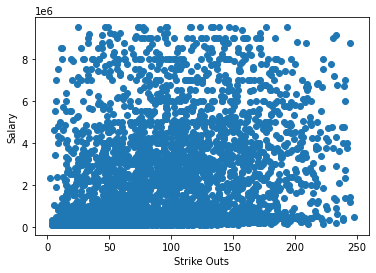

In [13]:
# visually inspect relationship between yrs ERA and salary
plt.scatter(df.SO, df.Salary)
plt.xlabel('Strike Outs')
plt.ylabel('Salary')
plt.show()

In [14]:
# format data to meet requirements of SciKit-learn library
X=df.GS.values.reshape(-1,1)
X.shape

(4349, 1)

In [25]:
# set target variable
y=df.Salary
y.shape

(4349,)

In [38]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [39]:
# create instance of linear regression model
model=LinearRegression()

In [40]:
# fitting /training/modeling
model.fit(X,y)
model

LinearRegression()

In [41]:
# Print the coefficient and the intercept for the model.

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [58140.3490432]
y-axis intercept:  750723.3492772814


In [42]:
# Note: We have to transform our min and max values 
# so they are in the format of array([[0.4999]]).
# This is the required format for `model.predict()`.

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[3]]
Max X Value: [[37]]


In [43]:
# Calculate the y_min and y_max by using model.predict and x_min and x_max.

y_min = model.predict(x_min)
y_max = model.predict(x_max)

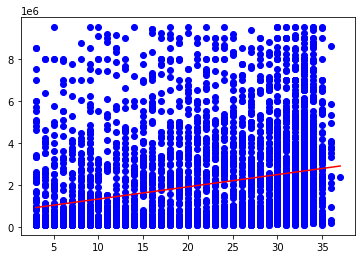

In [44]:
# Plot X and y by using plt.scatter.
# Plot the model fit line by using [x_min[0], x_max[0]], [y_min[0], y_max[0]].

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [45]:
# generate predictions
y_pred=model.predict(X)
print(y_pred.shape)

(4349,)


In [46]:
pd.options.display.float_format='{:,.0f}'.format
y_pred = model.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,"2,320,513",426000
1,"1,971,671",2200000
2,"2,436,793",502500
3,"1,739,109",160000
4,"1,390,267",300000


In [47]:
pct_error= (((y_test-y_pred)/y_test)*100)

In [48]:
y_pred = model.predict(X_test)
results_df=pd.DataFrame({"Predicted": y_pred, "Actual": y_test, "Percent Error": pct_error})[["Predicted", "Actual", "Percent Error"]]
results_df.abs()

,Predicted,Actual,Percent Error
3392,"2,320,513",426000,445
2878,"1,971,671",2200000,10
3802,"2,436,793",502500,385
1206,"1,739,109",160000,987
932,"1,390,267",300000,363
...,...,...,...
2111,"1,273,986",4500000,72
2695,"2,436,793",3500000,30
180,"2,029,811",785000,159
1352,"2,669,355",5050000,47


In [49]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score*100:.2f}%")
print(f"Testing Score: {testing_score*100:.2f}%")

Training Score: 5.80%
Testing Score: 7.84%


In [51]:
# Score the prediction with MSE and R2
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error (MSE): {mse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

mean squared error (MSE): 4841284725290.50
R-squared (R2 ): 0.08
